<a href="https://colab.research.google.com/github/aws3ma/computer_vision/blob/main/CV_tp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Oussema Trabelsi 3 IDSD ID G2

In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [ ]:
%cd /gdrive/MyDrive/computer_vision

/gdrive/MyDrive/computer_vision


In [ ]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import os
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
import os
import cv2

# Define the input and output directories
input_folder = 'MMU-Iris-Database/'
output_folder = 'grayscale_images/'
train_output = output_folder+'train'
test_output = output_folder+'test'


In [ ]:
# Create the output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)
os.makedirs(train_output, exist_ok=True)
os.makedirs(test_output, exist_ok=True)

# List all files in the input directory
classes = os.listdir(input_folder)

In [ ]:
# Process each image in the input folder
for classe in classes:
  right = os.listdir(os.path.join(input_folder,classe,'right'))
  train_right = right[:3]
  test_right = right[3:5]
  for image_file in train_right:
      # Check if the file is an image (you may want to refine this check)
      if image_file.endswith(('.jpg', '.png', '.jpeg', '.bmp')):
          # Read the image from the input directory
          input_path = os.path.join(input_folder, classe,'right',image_file)
          image = cv2.imread(input_path)
          # Convert the image to grayscale
          gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
          os.makedirs(os.path.join(train_output, classe,'right'), exist_ok=True)
          # Create the output file path
          output_path = os.path.join(train_output, classe,'right',image_file)
          # Save the grayscale image to the output directory
          cv2.imwrite(output_path, gray_image)

  for image_file in test_right:
      # Check if the file is an image (you may want to refine this check)
      if image_file.endswith(('.jpg', '.png', '.jpeg', '.bmp')):
          # Read the image from the input directory
          input_path = os.path.join(input_folder, classe,'right',image_file)
          image = cv2.imread(input_path)
          # Convert the image to grayscale
          gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
          os.makedirs(os.path.join(test_output, classe,'right'), exist_ok=True)
          # Create the output file path
          output_path = os.path.join(test_output, classe,'right',image_file)
          # Save the grayscale image to the output directory
          cv2.imwrite(output_path, gray_image)

  left = os.listdir(os.path.join(input_folder,classe,'left'))
  train_left = left[:3]
  test_left = left[3:5]
  for image_file in train_left:
      # Check if the file is an image (you may want to refine this check)
      if image_file.endswith(('.jpg', '.png', '.jpeg', '.bmp')):
          # Read the image from the input directory
          input_path = os.path.join(input_folder, classe,'left',image_file)
          image = cv2.imread(input_path)

          # Convert the image to grayscale
          gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

          # Create the output file path
          os.makedirs(os.path.join(train_output, classe,'left'), exist_ok=True)
          output_path = os.path.join(train_output, classe,'left',image_file)

          # Save the grayscale image to the output directory
          cv2.imwrite(output_path, gray_image)

  for image_file in test_left:
      # Check if the file is an image (you may want to refine this check)
      if image_file.endswith(('.jpg', '.png', '.jpeg', '.bmp')):
          # Read the image from the input directory
          input_path = os.path.join(input_folder, classe,'left',image_file)
          image = cv2.imread(input_path)

          # Convert the image to grayscale
          gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

          # Create the output file path
          os.makedirs(os.path.join(test_output, classe,'left'), exist_ok=True)
          output_path = os.path.join(test_output, classe,'left',image_file)

          # Save the grayscale image to the output directory
          cv2.imwrite(output_path, gray_image)
print("Conversion and saving complete.")

Conversion and saving complete.


In [ ]:
# Function to display original and grayscale images side by side
def show_images(original_image, grayscale_image):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')
    axes[1].imshow(grayscale_image, cmap='gray')
    axes[1].set_title('Grayscale')
    axes[1].axis('off')
    plt.show()

In [ ]:
%ls

grayscale_images/  MMU-Iris-Database/


In [ ]:
%cd grayscale_images/train/

/gdrive/MyDrive/computer_vision/grayscale_images/train


In [ ]:
%ls

1/   12/  15/  18/  20/  23/  26/  29/  31/  34/  37/  40/  43/  46/  7/
10/  13/  16/  19/  21/  24/  27/  3/   32/  35/  38/  41/  44/  5/   8/
11/  14/  17/  2/   22/  25/  28/  30/  33/  36/  39/  42/  45/  6/   9/


In [ ]:
img= cv2.imread('./1/left/aeval1.bmp',cv2.IMREAD_GRAYSCALE)

In [ ]:
img.shape

(240, 320)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

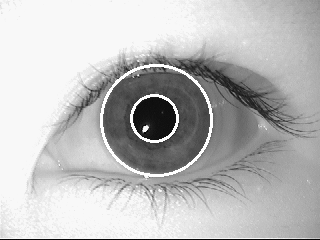

In [ ]:



# Load the segmented grayscale image (you should have already segmented the image)
segmented_image = cv2.imread('./1/left/aeval1.bmp',cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise (adjust the kernel size as needed)
blurred_image = cv2.GaussianBlur(segmented_image, (9, 9), 0)

# Apply circular Hough Transform to detect iris boundaries
circles = cv2.HoughCircles(
    blurred_image,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=50,
    param1=50,
    param2=30,
    minRadius=50,
    maxRadius=100
)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]

        # Draw the iris boundary (you can use this information to crop the iris region)
        cv2.circle(segmented_image, center, radius, (255, 255, 255), 2)

# Apply circular Hough Transform to detect iris boundaries
circles2 = cv2.HoughCircles(
    blurred_image,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=50,
    param1=50,
    param2=30,
    minRadius=10,
    maxRadius=50
)

if circles2 is not None:
    circles2 = np.uint16(np.around(circles2))
    for circle in circles2[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]

        # Draw the iris boundary (you can use this information to crop the iris region)
        cv2.circle(segmented_image, center, radius, (255, 255, 255), 2)

# Display the segmented iris image with iris boundaries
cv2_imshow(segmented_image)

In [ ]:

image = cv2.imread('./5/left/chongpkl2.bmp',cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('./14/left/liujwl5.bmp',cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread('./22/right/mimir5.bmp',cv2.IMREAD_GRAYSCALE)

In [ ]:
image.shape

(240, 320)

filtre pass bas

In [ ]:
median_filtered_image = cv2.medianBlur(image, 5)
median_filtered_image2 = cv2.medianBlur(image2, 5)
median_filtered_image3 = cv2.medianBlur(image3, 5)

In [ ]:
# Function to display original and grayscale images side by side
def show_filtered_images(original_image, filtered_image):
    fig, axes = plt.subplots(2, 3, figsize=(8, 4))
    for i in range(2):
      for j in range(3):
        if(i==0):
          axes[i][j].imshow(original_image[j], cmap='gray')
          axes[i][j].set_title('Original')
          axes[i][j].axis('off')
        if(i==1):
          axes[i][j].imshow(filtered_image[j], cmap='gray')
          axes[i][j].set_title('Filtered')
          axes[i][j].axis('off')
    plt.show()

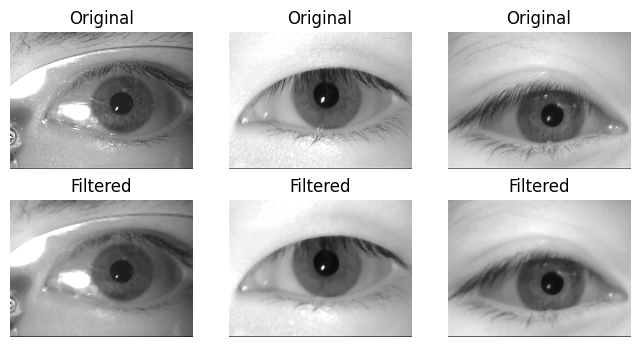

In [ ]:
show_filtered_images([image,image2,image3],[median_filtered_image,median_filtered_image2,median_filtered_image3])

In [ ]:
kernel_size = 5

# Apply the average filter using cv2.blur()
blurred_image = cv2.blur(image, (kernel_size, kernel_size))
blurred_image2 = cv2.blur(image2, (kernel_size, kernel_size))
blurred_image3 = cv2.blur(image3, (kernel_size, kernel_size))

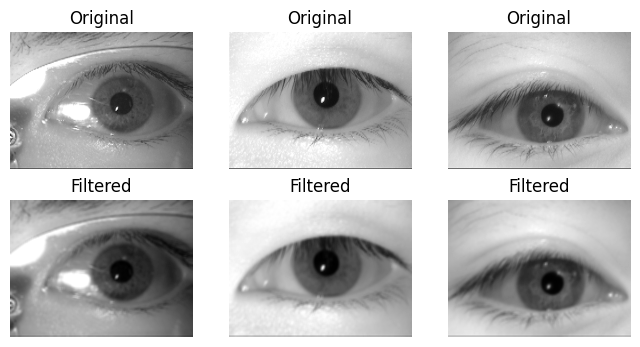

In [ ]:
show_filtered_images([image,image2,image3],[blurred_image,blurred_image2,blurred_image3])

In [ ]:
diameter = 9  # Diameter of each pixel neighborhood used during filtering
sigma_color = 75  # Filter sigma in the color space
sigma_space = 75  # Filter sigma in the coordinate space

# Apply the bilateral filter using cv2.bilateralFilter()
bilateral_filtered_image = cv2.bilateralFilter(image, diameter, sigma_color, sigma_space)
bilateral_filtered_image2 = cv2.bilateralFilter(image2, diameter, sigma_color, sigma_space)
bilateral_filtered_image3 = cv2.bilateralFilter(image3, diameter, sigma_color, sigma_space)


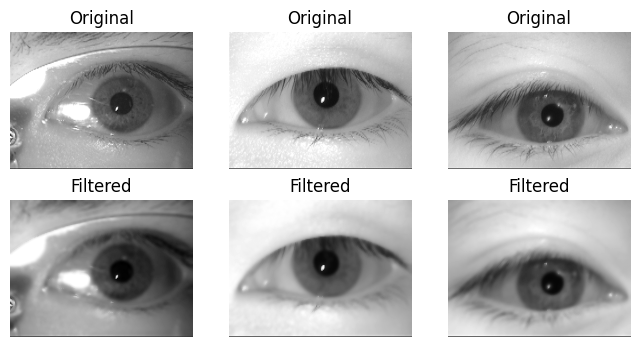

In [ ]:
show_filtered_images([image,image2,image3],[bilateral_filtered_image,bilateral_filtered_image2,bilateral_filtered_image3])

In [ ]:
# Define the kernel size for the Gaussian filter (must be positive and odd)
kernel_size = (5, 5)

# Define the standard deviation in the X and Y directions
sigma_x = 0
sigma_y = 0

# Apply the Gaussian filter using cv2.GaussianBlur()
gaussian_filtered_image = cv2.GaussianBlur(image, kernel_size, sigma_x, sigma_y)
gaussian_filtered_image2 = cv2.GaussianBlur(image2, kernel_size, sigma_x, sigma_y)
gaussian_filtered_image3 = cv2.GaussianBlur(image3, kernel_size, sigma_x, sigma_y)


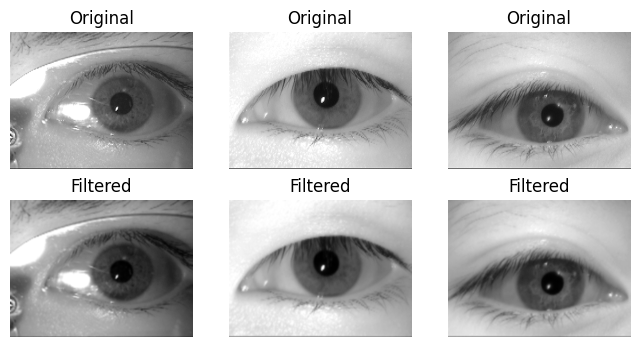

In [ ]:
show_filtered_images([image,image2,image3],[gaussian_filtered_image,gaussian_filtered_image2,gaussian_filtered_image3])

In [ ]:
# Apply the Laplacian filter using cv2.Laplacian()
laplacian_filtered_image = cv2.Laplacian(image, cv2.CV_64F)

# Convert the result to an 8-bit image
laplacian_filtered_image = np.uint8(np.abs(laplacian_filtered_image))


# Apply the Laplacian filter using cv2.Laplacian()
laplacian_filtered_image2 = cv2.Laplacian(image2, cv2.CV_64F)

# Convert the result to an 8-bit image
laplacian_filtered_image2 = np.uint8(np.abs(laplacian_filtered_image2))


# Apply the Laplacian filter using cv2.Laplacian()
laplacian_filtered_image3 = cv2.Laplacian(image3, cv2.CV_64F)

# Convert the result to an 8-bit image
laplacian_filtered_image3 = np.uint8(np.abs(laplacian_filtered_image3))


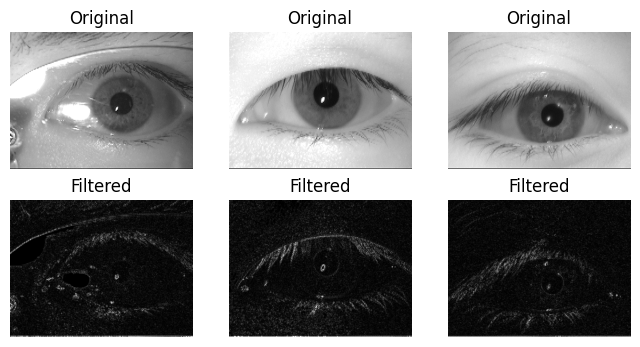

In [ ]:
show_filtered_images([image,image2,image3],[laplacian_filtered_image,laplacian_filtered_image2,laplacian_filtered_image3])

pass haut

In [ ]:
from scipy.ndimage import convolve

# Define the high pass filter kernel
kernel = np.array([[0, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 0]])

# Apply the high pass filter
filtered_image = convolve(image, kernel)
filtered_image2 = convolve(image2, kernel)
filtered_image3 = convolve(image3, kernel)

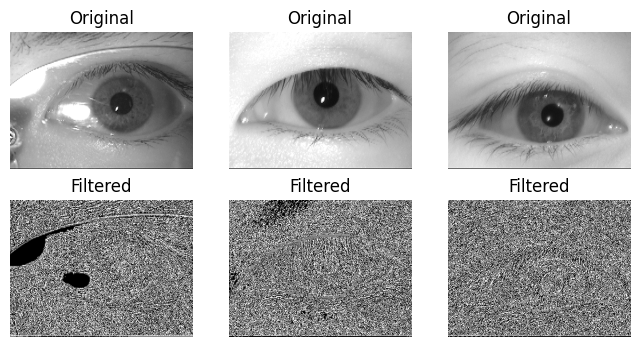

In [ ]:
show_filtered_images([image,image2,image3],[filtered_image,filtered_image2,filtered_image3])

In [ ]:
def laplacien(image,kernel):
  from scipy import ndimage
  # A very simple and very narrow highpass filter
  data = np.array(image, dtype=float)
  return ndimage.convolve(data, kernel)

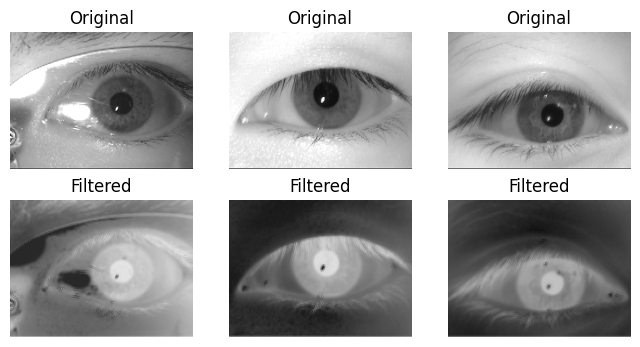

In [ ]:
kernel = np.array([[-1, -1, -1],
                    [-1,  4, -1],
                    [-1, -1, -1]])
laplacien_image = laplacien(image,kernel)
laplacien_image2 = laplacien(image2,kernel)
laplacien_image3 = laplacien(image3,kernel)
show_filtered_images([image,image2,image3],[laplacien_image,laplacien_image2,laplacien_image3])

In [ ]:
kernel = np.array([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1]])
laplacien_image = laplacien(image,kernel)
laplacien_image2 = laplacien(image2,kernel)
laplacien_image3 = laplacien(image3,kernel)

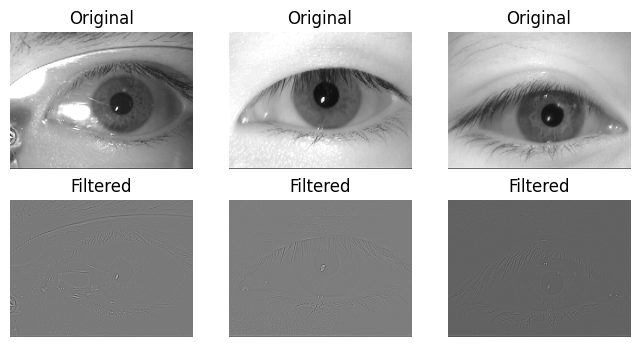

In [ ]:
show_filtered_images([image,image2,image3],[laplacien_image,laplacien_image2,laplacien_image3])

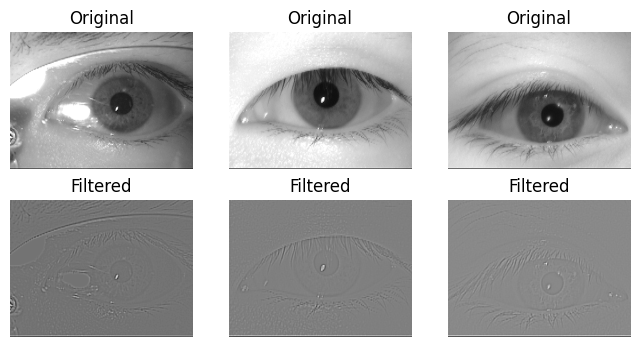

In [ ]:
kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])
laplacien_image = laplacien(image,kernel)
laplacien_image2 = laplacien(image2,kernel)
laplacien_image3 = laplacien(image3,kernel)
show_filtered_images([image,image2,image3],[laplacien_image,laplacien_image2,laplacien_image3])

fourrier

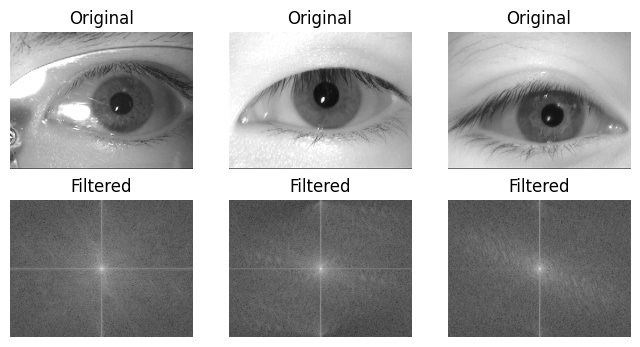

In [ ]:
dark_image_grey_fourier = np.log(abs(np.fft.fftshift(np.fft.fft2(image))))
dark_image2_grey_fourier = np.log(abs(np.fft.fftshift(np.fft.fft2(image2))))
dark_image3_grey_fourier = np.log(abs(np.fft.fftshift(np.fft.fft2(image3))))
# plt.figure(num=None, figsize=(8, 6), dpi=80)
# plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray');
show_filtered_images([image,image2,image3],[dark_image_grey_fourier,dark_image2_grey_fourier,dark_image3_grey_fourier])

In [ ]:
def fourier_transform_gray(image):
    f_size = 25
    gray_fft = np.fft.fftshift(np.fft.fft2(image))
    gray_fft[:225, 235:237] = 1
    gray_fft[-225:, 235:237] = 1
    return abs(np.fft.ifft2(gray_fft)).astype(int)

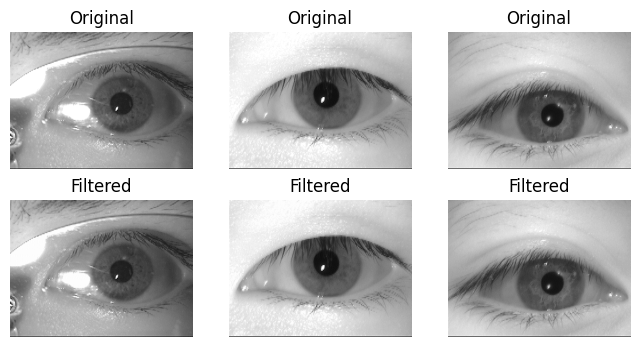

In [ ]:
fourier_image = fourier_transform_gray(image)
fourier_image2 = fourier_transform_gray(image2)
fourier_image3 = fourier_transform_gray(image3)
show_filtered_images([image,image2,image3],[fourier_image,fourier_image2,fourier_image3])

difficule de trouver les différences, donc j'utilise histogram pour comparer

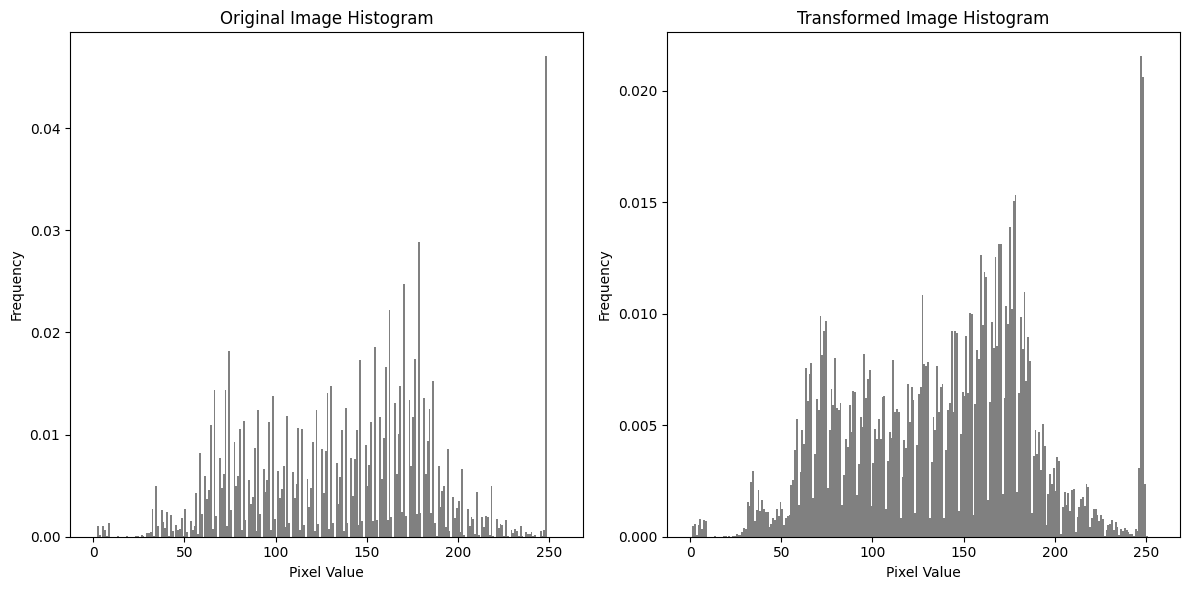

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(image.flatten(), bins=256, range=(0, 256), density=True, color='gray')
plt.title('Original Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Plot histogram for the Fourier-transformed image
plt.subplot(1, 2, 2)
plt.hist(fourier_image.flatten(), bins=256, range=(0, 256), density=True, color='gray')
plt.title('Transformed Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

gaussien avec fourrier

In [ ]:
def gaussien_and_fourrier(image):
    from scipy.ndimage import gaussian_filter
    # Assuming 'image' is a grayscale image
    fft_image = np.fft.fft2(image)
    fft_image_shifted = np.fft.fftshift(fft_image)

    # Apply Gaussian filter to the spectrum
    fft_image_shifted_filtered = gaussian_filter(fft_image_shifted, sigma=0.6)

    # Inverse Fourier transform
    return np.abs(np.fft.ifft2(np.fft.ifftshift(fft_image_shifted_filtered)))

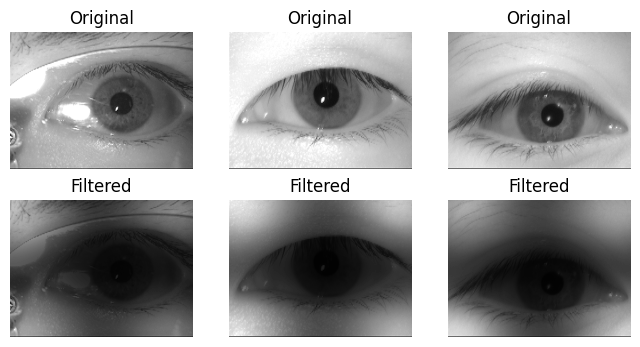

In [ ]:
gaf_image = gaussien_and_fourrier(image)
gaf_image2 = gaussien_and_fourrier(image2)
gaf_image3 = gaussien_and_fourrier(image3)
show_filtered_images([image,image2,image3],[gaf_image,gaf_image2,gaf_image3])

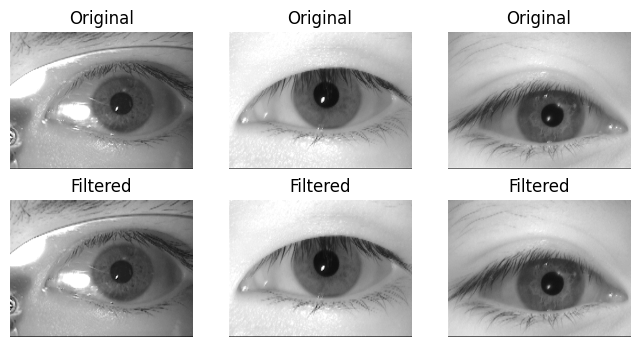

In [ ]:
import cv2
import numpy as np



# Define the kernel size for the minimum filter
kernel_size = (3, 3)

# Apply the minimum filter using cv2.erode
image_min_filtered = cv2.erode(image, kernel_size, iterations=1)
image2_min_filtered = cv2.erode(image2, kernel_size, iterations=1)
image3_min_filtered = cv2.erode(image3, kernel_size, iterations=1)

show_filtered_images([image,image2,image3],[image_min_filtered,image2_min_filtered,image3_min_filtered])

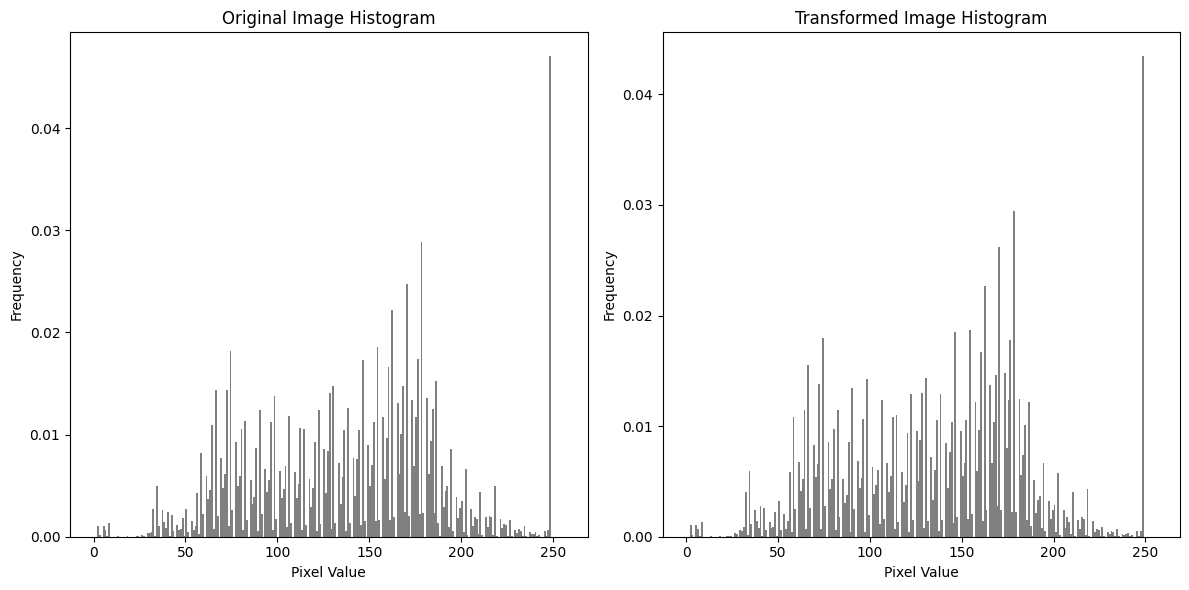

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(image.flatten(), bins=256, range=(0, 256), density=True, color='gray')
plt.title('Original Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Plot histogram for the Fourier-transformed image
plt.subplot(1, 2, 2)
plt.hist(image_min_filtered.flatten(), bins=256, range=(0, 256), density=True, color='gray')
plt.title('Transformed Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
import cv2

def seuillage(threshold_value):
  # Apply thresholding
  max_value = 255  # Maximum value to be assigned if pixel value is above the threshold
  _, thresholded_image = cv2.threshold(image, threshold_value, max_value, cv2.THRESH_BINARY)
  _, thresholded_image2 = cv2.threshold(image2, threshold_value, max_value, cv2.THRESH_BINARY)
  _, thresholded_image3 = cv2.threshold(image3, threshold_value, max_value, cv2.THRESH_BINARY)
  return [thresholded_image,thresholded_image2,thresholded_image3]


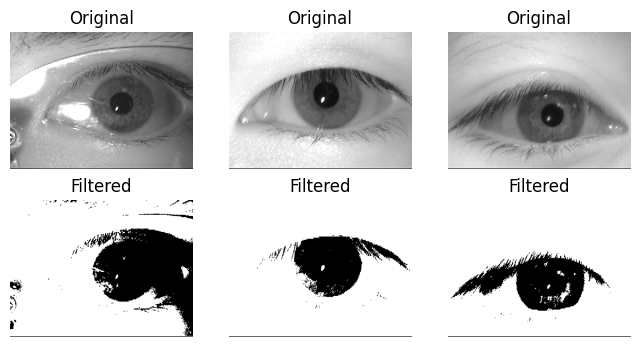

In [ ]:
show_filtered_images([image,image2,image3],seuillage(100))

seuil d'Otsu

In [ ]:
# Function to display original and grayscale images side by side
def show_otsu_images(original_image, filtered_image:dict):
    fig, axes = plt.subplots(2, 3, figsize=(8, 4))
    for i in range(2):
      for j in range(3):
        if(i==0):
          axes[i][j].imshow(original_image[j], cmap='gray')
          axes[i][j].set_title('Original')
          axes[i][j].axis('off')
        if(i==1):
          axes[i][j].imshow(list(filtered_image.values())[j], cmap='gray')
          axes[i][j].set_title('Otsu thresh = '+str(list(filtered_image.keys())[j]))
          axes[i][j].axis('off')
    plt.show()

In [ ]:
_, thresholded_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_2, thresholded_image2 = cv2.threshold(image2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_3, thresholded_image3 = cv2.threshold(image3, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [ ]:
temp_dict={_:thresholded_image,_2:thresholded_image2,_3:thresholded_image3}

In [ ]:
list(temp_dict.values())[0]

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

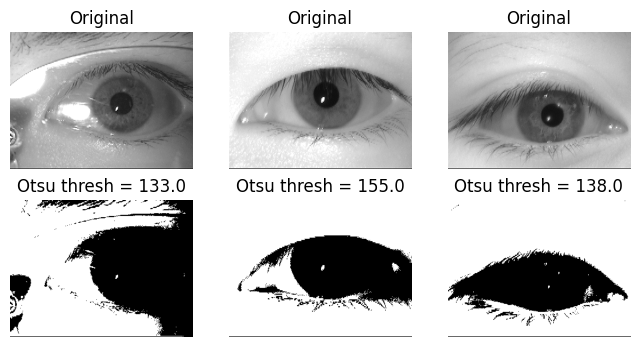

In [ ]:
show_otsu_images([image,image2,image3],{_:thresholded_image,_2:thresholded_image2,_3:thresholded_image3})

Sauvola

In [ ]:
thresh_sauvola_image = cv2.ximgproc.niBlackThreshold(image, maxValue=255, type=cv2.THRESH_BINARY_INV, blockSize=25, k=0.2)
thresh_sauvola_image2 = cv2.ximgproc.niBlackThreshold(image2, maxValue=255, type=cv2.THRESH_BINARY_INV, blockSize=25, k=0.2)
thresh_sauvola_image3 = cv2.ximgproc.niBlackThreshold(image3, maxValue=255, type=cv2.THRESH_BINARY_INV, blockSize=25, k=0.2)

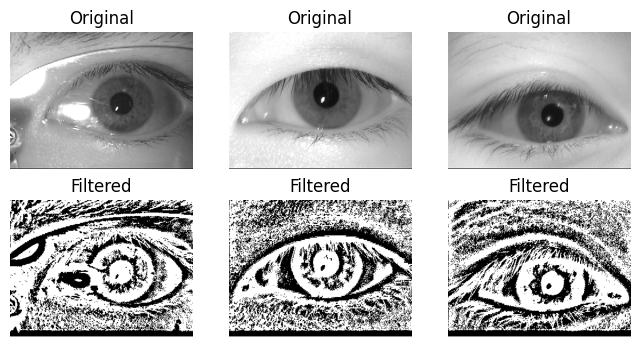

In [ ]:
show_filtered_images([image,image2,image3],[thresh_sauvola_image,thresh_sauvola_image2,thresh_sauvola_image3])

In [ ]:
def show_hist_of_two_images(image,image_filtered):
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.hist(image.flatten(), bins=256, range=(0, 256), density=True, color='gray')
  plt.title('Original Image Histogram')
  plt.xlabel('Pixel Value')
  plt.ylabel('Frequency')

  # Plot histogram for the Fourier-transformed image
  plt.subplot(1, 2, 2)
  plt.hist(image_filtered.flatten(), bins=256, range=(0, 256), density=True, color='gray')
  plt.title('Transformed Image Histogram')
  plt.xlabel('Pixel Value')
  plt.ylabel('Frequency')

  plt.tight_layout()
  plt.show()

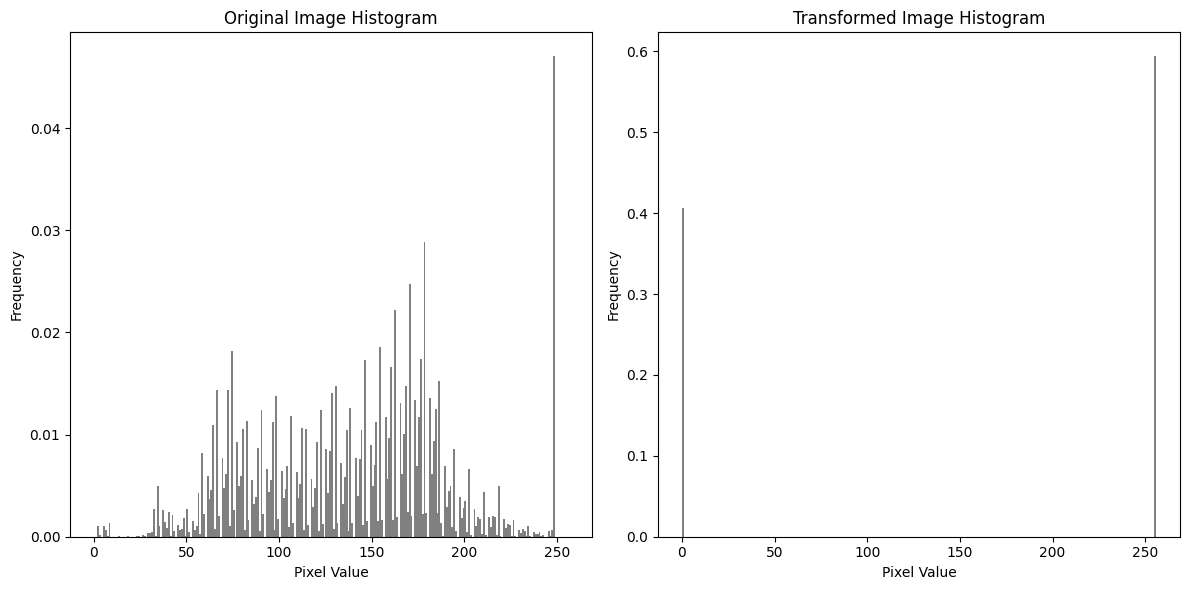

In [ ]:
show_hist_of_two_images(image,thresh_sauvola_image)

Wolf

In [ ]:
# Define the Wolf thresholding function
def wolf_threshold(image, R, k):
    m, n = image.shape
    thresholded = np.zeros(image.shape, dtype=np.uint8)

    for i in range(m):
        for j in range(n):
            neighborhood = image[i - R:i + R, j - R:j + R]
            local_mean = np.mean(neighborhood)
            local_std = np.std(neighborhood)
            T = local_mean + k * local_std
            if image[i, j] > T:
                thresholded[i, j] = 255

    return thresholded

In [ ]:
# Set the parameters (you may need to adjust these)
R = 15  # Radius of the neighborhood
k = 0.5  # A constant factor

# Apply Wolf thresholding
wolf_thresh_image = wolf_threshold(image, R, k)
wolf_thresh_image2 = wolf_threshold(image2, R, k)
wolf_thresh_image3 = wolf_threshold(image3, R, k)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


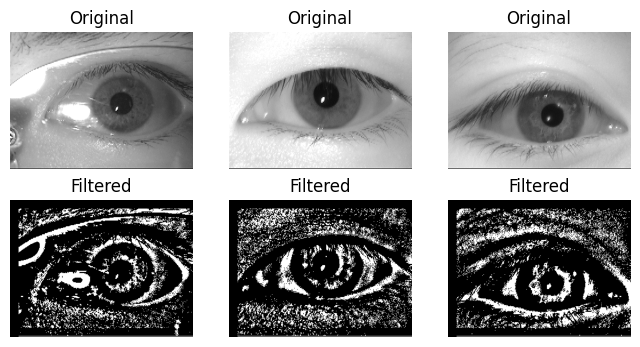

In [ ]:
show_filtered_images([image,image2,image3],[wolf_thresh_image,wolf_thresh_image2,wolf_thresh_image3])

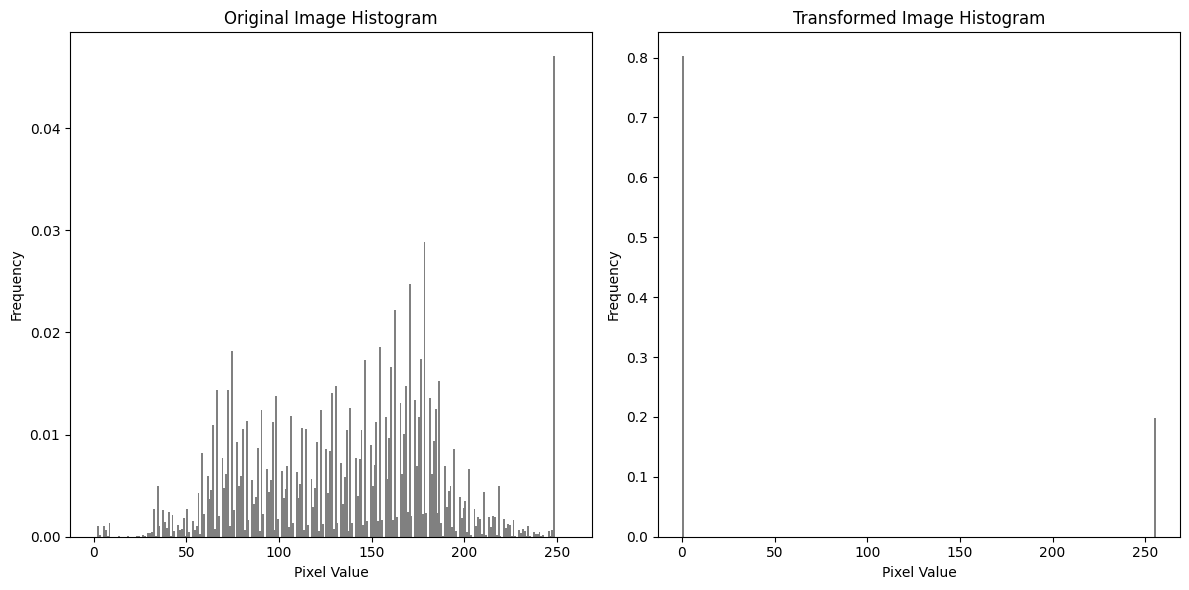

In [ ]:
show_hist_of_two_images(image,wolf_thresh_image)

NiBlack

In [ ]:
threshold_image = cv2.ximgproc.niBlackThreshold(image, maxValue=255, type=cv2.THRESH_BINARY_INV, blockSize=15, k=0.2)
threshold_image2 = cv2.ximgproc.niBlackThreshold(image2, maxValue=255, type=cv2.THRESH_BINARY_INV, blockSize=15, k=0.2)
threshold_image3 = cv2.ximgproc.niBlackThreshold(image3, maxValue=255, type=cv2.THRESH_BINARY_INV, blockSize=15, k=0.2)


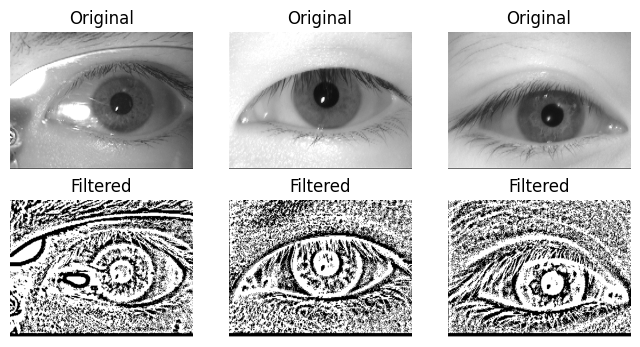

In [ ]:
show_filtered_images([image,image2,image3],[threshold_image,threshold_image2,threshold_image3])

In [ ]:
def display_images_vir(images,titles):
    num_images = len(images)
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))

    for i in range(2):
        for j in range(3):
            idx = i * 3 + j
            if idx < num_images:
                axes[i, j].imshow(images[idx], cmap='viridis')
                axes[i, j].set_title(titles[idx])
                axes[i, j].axis('off')
            else:
                axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
def display_images(images,titles):
    num_images = len(images)
    fig, axes = plt.subplots(1, 3, figsize=(12, 8))

    for j in range(3):
        axes[j].imshow(images[j], cmap='gray')
        axes[j].set_title(titles[j])
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.cluster import KMeans
k=[3,5,7,20]
images=[image,image2,image3]
images_np = [np.array(im) for im in images]
# Define the number of clusters (K)
num_clusters = 20  # Adjust this value based on your needs
seg=[]
for im in images_np:
    # Flatten the image to a 1D array of RGB values
    pixels = im.reshape(-1, 3)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(pixels)

    # Get the cluster labels and centroids
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Assign each pixel to the nearest centroid (cluster)
    segmented_image = centroids[labels].reshape(im.shape).astype(np.uint8)
    seg.append(segmented_image)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


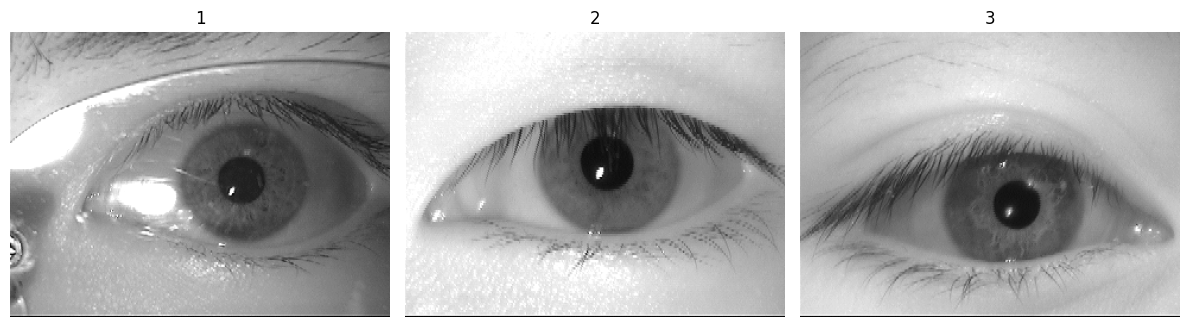

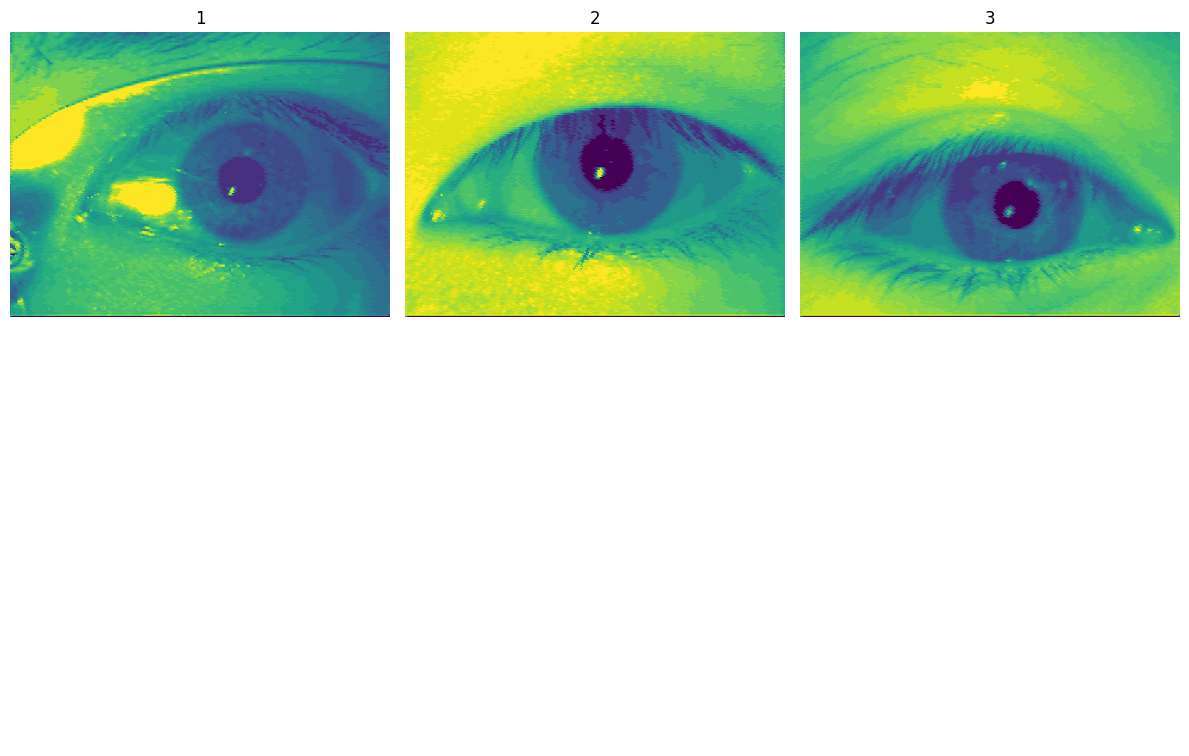

In [ ]:
titles=['1','2','3']
display_images(images, titles)
display_images_vir(seg, titles)
# show_filtered_images(images,seg)

In [ ]:
# Apply the Sobel edge detection filter
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

# Calculate the magnitude of gradients
magnitude = np.sqrt(sobelx**2 + sobely**2)

# Apply thresholding to segment the edges
threshold = 100  # Adjust this threshold as needed
sobel_image = cv2.threshold(magnitude, threshold, 255, cv2.THRESH_BINARY)[1]


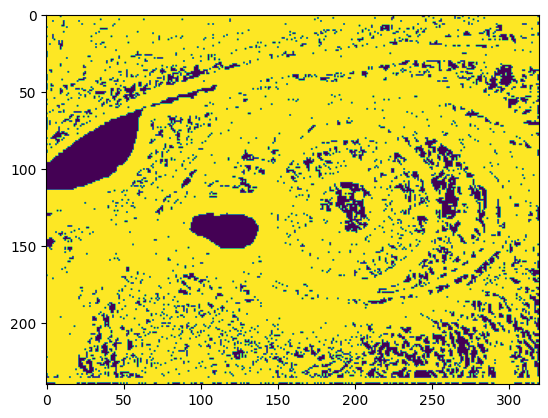

In [ ]:
plt.imshow(sobel_image)

Sobel

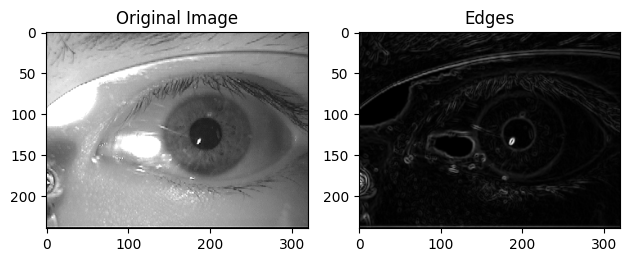

In [ ]:
import cv2
import numpy as np



# Apply Gaussian blur to reduce noise (optional)
image_blurred = cv2.GaussianBlur(image, (3, 3), 0)

# Calculate gradients using the Sobel operator
gradient_x = cv2.Sobel(image_blurred, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(image_blurred, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the magnitude of gradients
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Normalize the gradient magnitude to the range [0, 255]
gradient_magnitude_normalized = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Plot the edges
plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude_normalized, cmap='gray')
plt.title('Edges')

plt.tight_layout()
plt.show()


Laplacien

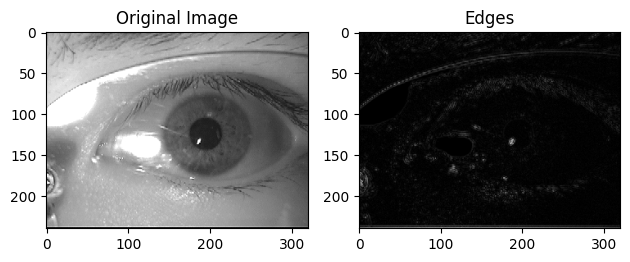

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Apply Gaussian blur to reduce noise (optional)
image_blurred = cv2.GaussianBlur(image, (3, 3), 0)

# Apply Laplacian operator for edge detection
edges = cv2.Laplacian(image_blurred, cv2.CV_64F)

# Convert the edges to absolute values
edges = np.absolute(edges)

# Convert the edges to 8-bit format
edges = np.uint8(edges)

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Plot the edges
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edges')

plt.tight_layout()
plt.show()

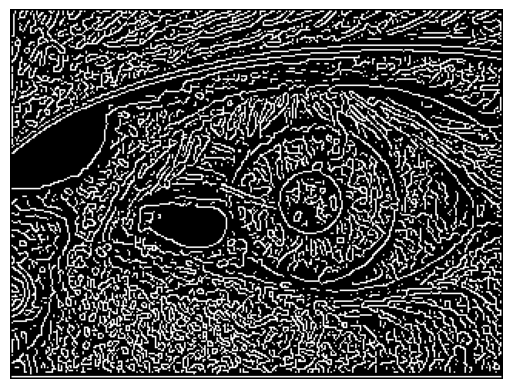

In [ ]:
import numpy as np
from skimage import io, feature

def canny_segmentation(gray_image, sigma=1.0, low_threshold=0.1, high_threshold=0.2):

    # Apply the Canny edge detection algorithm
    edges = feature.canny(gray_image, sigma=sigma, low_threshold=low_threshold, high_threshold=high_threshold)

    # Afficher l'image des contours
    plt.imshow(edges, cmap='gray')
    plt.axis('off')
    plt.show()



# Exemple d'utilisation

canny_segmentation(image)

In [ ]:
def canny_segmentation_image(gray_image, sigma=1.0, low_threshold=0.1, high_threshold=0.2):

    # Apply the Canny edge detection algorithm
    edges = feature.canny(gray_image, sigma=sigma, low_threshold=low_threshold, high_threshold=high_threshold)
    return edges